In [1]:
# Install required libraries
!pip install plotly umap-learn scikit-learn pandas matplotlib tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_digits, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from umap import UMAP
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

# Helper function for visualization
def interactive_plot_2d(data_2d, labels, title):
    fig = px.scatter(
        x=data_2d[:, 0],
        y=data_2d[:, 1],
        color=labels.astype(str),
        title=title,
        labels={'color': 'Class'},
    )
    fig.show()

# Dataset 1: Digits dataset (Image data)
digits = load_digits()
digits_data = StandardScaler().fit_transform(digits.data)
digits_labels = digits.target

# Dataset 2: Iris dataset (Tabular data)
iris = load_iris()
iris_data = StandardScaler().fit_transform(iris.data)
iris_labels = iris.target

# Dimensionality reduction techniques
methods = {
    "PCA": PCA(n_components=2),
    "Randomized PCA": PCA(n_components=2, svd_solver='randomized'),
    "Kernel PCA": KernelPCA(n_components=2, kernel='rbf'),
    "Incremental PCA": IncrementalPCA(n_components=2),
    "Factor Analysis": FactorAnalysis(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "UMAP": UMAP(n_components=2, random_state=42),
    "MDS": MDS(n_components=2),
    "ISOMAP": Isomap(n_components=2),
    "LLE": LocallyLinearEmbedding(n_components=2),
}

# Autoencoder for dimensionality reduction
def create_autoencoder(input_dim, latent_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(latent_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Dimensionality reduction and visualization for each method
def apply_methods(data, labels, dataset_name):
    print(f"Processing {dataset_name}...")
    for name, method in methods.items():
        reduced_data = method.fit_transform(data)
        interactive_plot_2d(reduced_data, labels, f"{name} on {dataset_name}")

    # Autoencoder
    print("Applying Autoencoder...")
    input_dim = data.shape[1]
    latent_dim = 2
    autoencoder, encoder = create_autoencoder(input_dim, latent_dim)
    autoencoder.fit(data, data, epochs=50, batch_size=32, verbose=0)
    autoencoded_data = encoder.predict(data)
    interactive_plot_2d(autoencoded_data, labels, f"Autoencoder on {dataset_name}")

# Apply methods to Digits dataset
apply_methods(digits_data, digits_labels, "Digits Dataset")

# Apply methods to Iris dataset
apply_methods(iris_data, iris_labels, "Iris Dataset")


Processing Digits Dataset...


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Applying Autoencoder...
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Processing Iris Dataset...


Applying Autoencoder...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_digits, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from umap import UMAP
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

# Helper function for visualization
def interactive_plot_2d(data_2d, labels, title):
    fig = px.scatter(
        x=data_2d[:, 0],
        y=data_2d[:, 1],
        color=labels.astype(str),
        title=title,
        labels={'color': 'Class'},
    )
    fig.show()

# Dataset 1: Digits dataset (Image data)
digits = load_digits()
digits_data = StandardScaler().fit_transform(digits.data)
digits_labels = digits.target

# Dataset 2: Iris dataset (Tabular data)
iris = load_iris()
iris_data = StandardScaler().fit_transform(iris.data)
iris_labels = iris.target

# Dimensionality reduction techniques
methods = {
    "PCA": PCA(n_components=2),
    "Randomized PCA": PCA(n_components=2, svd_solver='randomized'),
    "Kernel PCA": KernelPCA(n_components=2, kernel='rbf'),
    "Incremental PCA": IncrementalPCA(n_components=2),
    "Factor Analysis": FactorAnalysis(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "UMAP": UMAP(n_components=2, random_state=42),
    "MDS": MDS(n_components=2),
    "ISOMAP": Isomap(n_components=2),
    "LLE": LocallyLinearEmbedding(n_components=2),
}

# Autoencoder for dimensionality reduction
def create_autoencoder(input_dim, latent_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(latent_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Store results globally
results_comparison = []

def apply_methods(data, labels, dataset_name):
    print(f"Processing {dataset_name}...")
    for name, method in methods.items():
        start_time = time.time()

        # Perform dimensionality reduction
        reduced_data = method.fit_transform(data)
        computation_time = time.time() - start_time

        # Calculate reconstruction error if inverse_transform is available
        try:
            reconstructed_data = method.inverse_transform(reduced_data)
            reconstruction_error = mean_squared_error(data, reconstructed_data)
        except AttributeError:
            reconstruction_error = None

        # Calculate explained variance if available
        explained_variance = (
            np.sum(method.explained_variance_ratio_)
            if hasattr(method, "explained_variance_ratio_") else None
        )

        # Store the results
        results_comparison.append({
            "Dataset": dataset_name,
            "Method": name,
            "Explained Variance": explained_variance,
            "Reconstruction Error": reconstruction_error,
            "Computation Time (s)": computation_time
        })

        # Interactive plot for the current method
        interactive_plot_2d(reduced_data, labels, f"{name} on {dataset_name}")

    # Autoencoder
    print("Applying Autoencoder...")
    input_dim = data.shape[1]
    latent_dim = 2
    autoencoder, encoder = create_autoencoder(input_dim, latent_dim)
    start_time = time.time()
    autoencoder.fit(data, data, epochs=50, batch_size=32, verbose=0)
    computation_time = time.time() - start_time

    # Generate autoencoded data
    autoencoded_data = encoder.predict(data)
    reconstruction_error = mean_squared_error(data, autoencoder.predict(data))

    # Store autoencoder results
    results_comparison.append({
        "Dataset": dataset_name,
        "Method": "Autoencoder",
        "Explained Variance": None,  # Not applicable for autoencoder
        "Reconstruction Error": reconstruction_error,
        "Computation Time (s)": computation_time
    })

    # Interactive plot for autoencoder
    interactive_plot_2d(autoencoded_data, labels, f"Autoencoder on {dataset_name}")

# Apply methods to Digits dataset
apply_methods(digits_data, digits_labels, "Digits Dataset")

# Apply methods to Iris dataset
apply_methods(iris_data, iris_labels, "Iris Dataset")



Processing Digits Dataset...


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Applying Autoencoder...


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Processing Iris Dataset...


Applying Autoencoder...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


,Dataset,Method,Explained Variance,Reconstruction Error,Computation Time (s)
0,Digits Dataset,PCA,0.215950,0.747298,0.004309
1,Digits Dataset,Randomized PCA,0.215950,0.747298,0.190220
2,Digits Dataset,Kernel PCA,NaN,NaN,0.398049
3,Digits Dataset,Incremental PCA,0.207057,0.750268,0.176718
4,Digits Dataset,Factor Analysis,NaN,NaN,0.293317
5,Digits Dataset,t-SNE,NaN,NaN,21.036212
6,Digits Dataset,UMAP,NaN,0.498158,6.251334
7,Digits Dataset,MDS,NaN,NaN,116.728090
8,Digits Dataset,ISOMAP,NaN,NaN,1.714511
9,Digits Dataset,LLE,NaN,NaN,0.205208


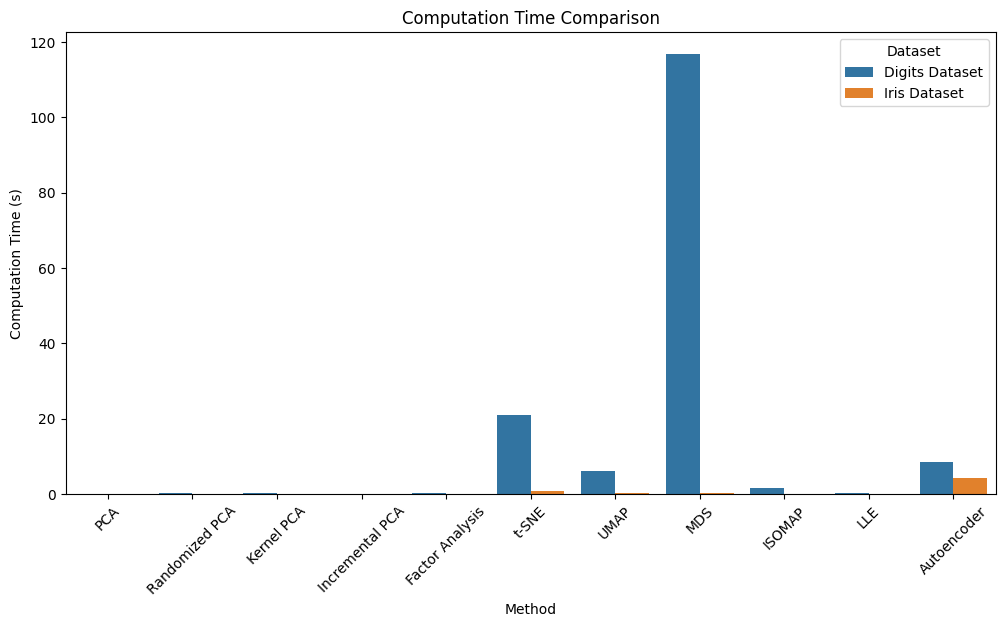

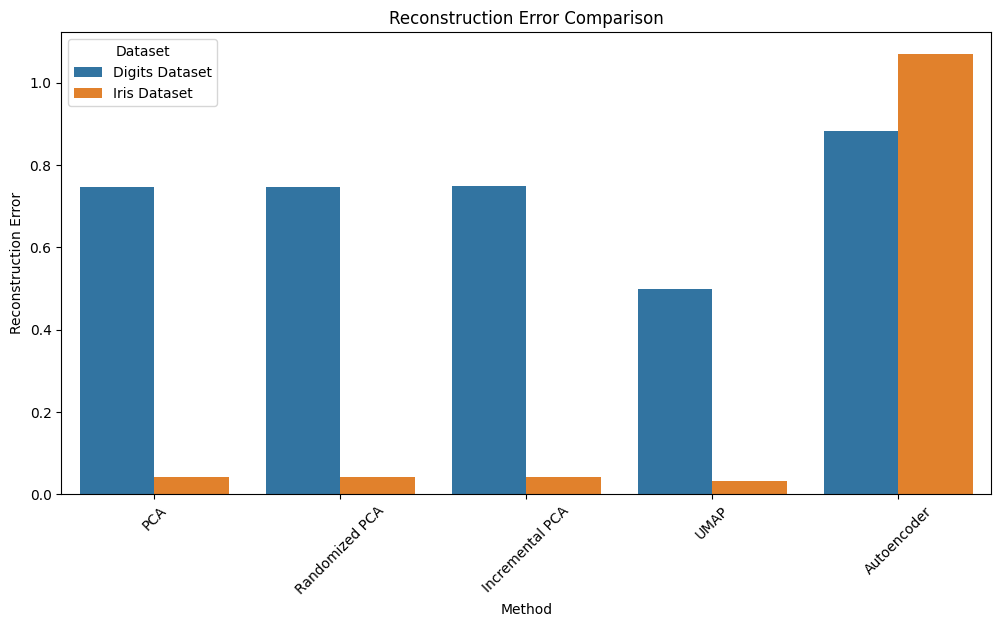

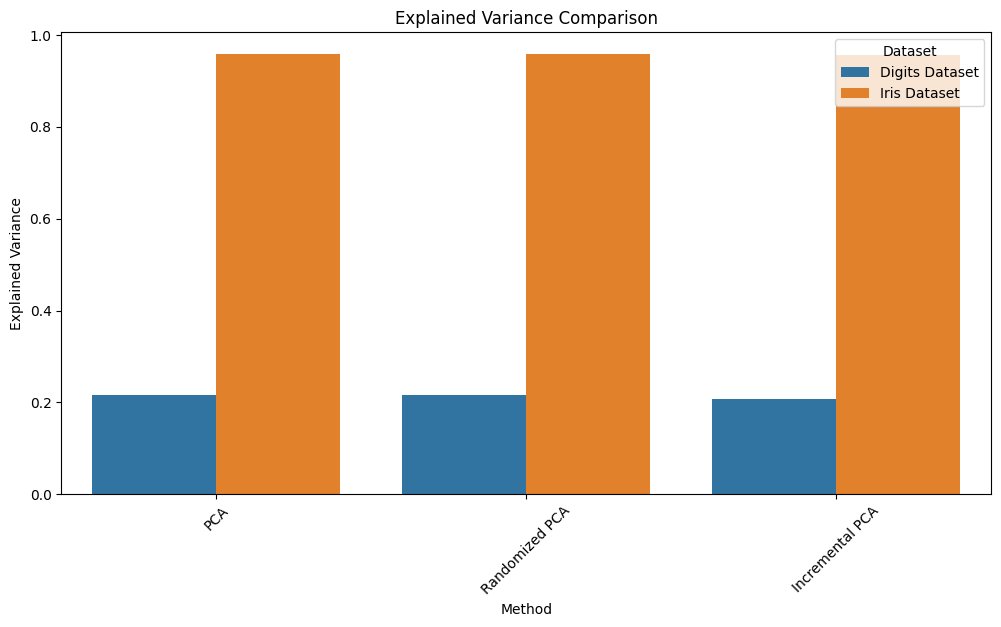

In [15]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results_comparison)

# Display the results
from IPython.display import display
display(results_df)

# Visualization of Comparisons
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Computation Time
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Method", y="Computation Time (s)", hue="Dataset")
plt.title("Computation Time Comparison")
plt.xticks(rotation=45)
plt.show()

# Plot Reconstruction Error (if applicable)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df["Reconstruction Error"].notnull()], x="Method", y="Reconstruction Error", hue="Dataset")
plt.title("Reconstruction Error Comparison")
plt.xticks(rotation=45)
plt.show()

# Plot Explained Variance (if applicable)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df["Explained Variance"].notnull()], x="Method", y="Explained Variance", hue="Dataset")
plt.title("Explained Variance Comparison")
plt.xticks(rotation=45)
plt.show()
